# Importing of Important Libraries

In [1]:
#Importing of important libraries
import numpy as np
import pandas as pd
import random
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

# Reading in and Defining of Data

In [2]:
load = pd.read_csv("appliances.csv")
load

,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,17/09/2013 22:08,695,88,0,0,0,0,0,0,0,0
1,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0
2,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0
3,17/09/2013 22:08,702,88,0,0,0,0,0,0,0,0
4,17/09/2013 22:08,700,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
487246,26/12/2013 16:07,355,1,5,0,0,0,0,0,0,0
487247,26/12/2013 16:08,358,1,5,0,0,0,0,0,0,0
487248,26/12/2013 16:08,322,1,25,0,0,0,0,0,0,0
487249,26/12/2013 16:08,280,1,25,0,0,0,0,0,0,0


In [3]:
load

,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,17/09/2013 22:08,695,88,0,0,0,0,0,0,0,0
1,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0
2,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0
3,17/09/2013 22:08,702,88,0,0,0,0,0,0,0,0
4,17/09/2013 22:08,700,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
487246,26/12/2013 16:07,355,1,5,0,0,0,0,0,0,0
487247,26/12/2013 16:08,358,1,5,0,0,0,0,0,0,0
487248,26/12/2013 16:08,322,1,25,0,0,0,0,0,0,0
487249,26/12/2013 16:08,280,1,25,0,0,0,0,0,0,0


## Check for missing data
load.isnull().sum()

## Check and Change Revenue Date Column into "Datetime" Data Type
load.dtypes

In [4]:
load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487251 entries, 0 to 487250
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Time             487251 non-null  object
 1   Aggregate        487251 non-null  int64 
 2   Fridge-Freezer   487251 non-null  int64 
 3   Washing Machine  487251 non-null  int64 
 4   Dishwasher       487251 non-null  int64 
 5   Television Site  487251 non-null  int64 
 6   Microwave        487251 non-null  int64 
 7   Toaster          487251 non-null  int64 
 8   Hi-Fi            487251 non-null  int64 
 9   Kettle           487251 non-null  int64 
 10  Overhead Fan     487251 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 40.9+ MB


## Check for Missing Data
load.isnull().sum()

In [5]:
#partial seperation of the Time column that's attached to date from the raw data
load[["Date", "time"]] = load["Time"].str.split(" ", expand = True)
load

,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,Date,time
0,17/09/2013 22:08,695,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
1,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
2,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
3,17/09/2013 22:08,702,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
4,17/09/2013 22:08,700,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,26/12/2013 16:07,355,1,5,0,0,0,0,0,0,0,26/12/2013,16:07
487247,26/12/2013 16:08,358,1,5,0,0,0,0,0,0,0,26/12/2013,16:08
487248,26/12/2013 16:08,322,1,25,0,0,0,0,0,0,0,26/12/2013,16:08
487249,26/12/2013 16:08,280,1,25,0,0,0,0,0,0,0,26/12/2013,16:08


In [6]:
#removing the Time column from the table (no longer necessary)
load = load.drop(["Time"], axis=1)
load

,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,Date,time
0,695,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
1,694,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
2,694,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
3,702,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
4,700,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
...,...,...,...,...,...,...,...,...,...,...,...,...
487246,355,1,5,0,0,0,0,0,0,0,26/12/2013,16:07
487247,358,1,5,0,0,0,0,0,0,0,26/12/2013,16:08
487248,322,1,25,0,0,0,0,0,0,0,26/12/2013,16:08
487249,280,1,25,0,0,0,0,0,0,0,26/12/2013,16:08


In [7]:
#Process date feature into day and month
#Process time feature into hour and minute
load[["Hour", "Minute"]] = load["time"].str.split(":", expand = True)
load[["Day", "Month", "Year"]] = load["Date"].str.split("/", expand = True)
load = load.drop(["time", "Date"], axis=1)
load

,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,Hour,Minute,Day,Month,Year
0,695,88,0,0,0,0,0,0,0,0,22,08,17,09,2013
1,694,88,0,0,0,0,0,0,0,0,22,08,17,09,2013
2,694,88,0,0,0,0,0,0,0,0,22,08,17,09,2013
3,702,88,0,0,0,0,0,0,0,0,22,08,17,09,2013
4,700,88,0,0,0,0,0,0,0,0,22,08,17,09,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,355,1,5,0,0,0,0,0,0,0,16,07,26,12,2013
487247,358,1,5,0,0,0,0,0,0,0,16,08,26,12,2013
487248,322,1,25,0,0,0,0,0,0,0,16,08,26,12,2013
487249,280,1,25,0,0,0,0,0,0,0,16,08,26,12,2013


In [8]:
#rearranging the columns
load =load.reindex(columns = ["Day", "Month","Year","Hour","Minute","Aggregate",	"Fridge-Freezer",	"Washing Machine",	"Dishwasher",	"Television Site",	"Microwave",	"Toaster",	"Hi-Fi",	"Kettle",	"Overhead Fan"])
load

,Day,Month,Year,Hour,Minute,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,17,09,2013,22,08,695,88,0,0,0,0,0,0,0,0
1,17,09,2013,22,08,694,88,0,0,0,0,0,0,0,0
2,17,09,2013,22,08,694,88,0,0,0,0,0,0,0,0
3,17,09,2013,22,08,702,88,0,0,0,0,0,0,0,0
4,17,09,2013,22,08,700,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,26,12,2013,16,07,355,1,5,0,0,0,0,0,0,0
487247,26,12,2013,16,08,358,1,5,0,0,0,0,0,0,0
487248,26,12,2013,16,08,322,1,25,0,0,0,0,0,0,0
487249,26,12,2013,16,08,280,1,25,0,0,0,0,0,0,0


In [9]:
load.tail()

,Day,Month,Year,Hour,Minute,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
487246,26,12,2013,16,07,355,1,5,0,0,0,0,0,0,0
487247,26,12,2013,16,08,358,1,5,0,0,0,0,0,0,0
487248,26,12,2013,16,08,322,1,25,0,0,0,0,0,0,0
487249,26,12,2013,16,08,280,1,25,0,0,0,0,0,0,0
487250,26,12,2013,16,08,280,1,18,0,0,0,0,0,0,0


In [10]:
#let us study the month index
load.Month.unique()

array(['09', '10', '12'], dtype=object)

In [11]:
#convert the Hour data type to intigers for next step to be executable
load['Month']=load['Month'].astype('int')

def month(Month):
    if Month in [9]:
        month = 'September'
    elif Month in [10]:
        month = 'October'
    else:
        month = 'December'
    return month

load['month']=load['Month'].apply(month)
load

,Day,Month,Year,Hour,Minute,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,month
0,17,9,2013,22,08,695,88,0,0,0,0,0,0,0,0,September
1,17,9,2013,22,08,694,88,0,0,0,0,0,0,0,0,September
2,17,9,2013,22,08,694,88,0,0,0,0,0,0,0,0,September
3,17,9,2013,22,08,702,88,0,0,0,0,0,0,0,0,September
4,17,9,2013,22,08,700,88,0,0,0,0,0,0,0,0,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,26,12,2013,16,07,355,1,5,0,0,0,0,0,0,0,December
487247,26,12,2013,16,08,358,1,5,0,0,0,0,0,0,0,December
487248,26,12,2013,16,08,322,1,25,0,0,0,0,0,0,0,December
487249,26,12,2013,16,08,280,1,25,0,0,0,0,0,0,0,December


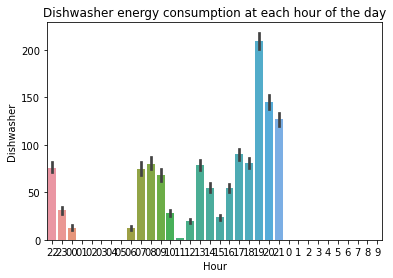

In [12]:
sns.barplot(x=load['Hour'], y=load['Dishwasher'])
plt.title('Dishwasher energy consumption at each hour of the day')
plt.show()

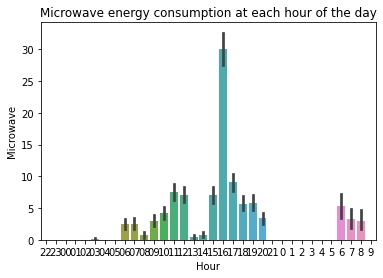

In [13]:
sns.barplot(x=load['Hour'], y=load['Microwave'])
plt.title('Microwave energy consumption at each hour of the day')
plt.show()

In [14]:
load.Hour.unique()

array(['22', '23', '00', '01', '02', '03', '04', '05', '06', '07', '08',
       '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
      dtype=object)

In [15]:
#convert the Hour data type to intigers for next step to be executable
load['Hour']=load['Hour'].astype('int')

#let us group the hours to time of the day (Morning, Afternoon, Evening and Night)
#Morning - 5:00 to 11:59, Afternoon - 12:00 to 15:59, Evening - 18:00 to 22:59 and Night - 22:00 - 16:59
#Now we shall create the timing variables based on hour
def Hours_timing(Hour):
    if Hour in [5,6,7,8,9,10,11]:
        timing = 'Morning'
    elif Hour in range(12,18):
        timing = 'Afternoon'
    elif Hour in range(18,22):
        timing = 'Evening'
    else:
        timing = 'Night'
    return timing


load['timing']=load['Hour'].apply(Hours_timing)
load


,Day,Month,Year,Hour,Minute,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,month,timing
0,17,9,2013,22,08,695,88,0,0,0,0,0,0,0,0,September,Night
1,17,9,2013,22,08,694,88,0,0,0,0,0,0,0,0,September,Night
2,17,9,2013,22,08,694,88,0,0,0,0,0,0,0,0,September,Night
3,17,9,2013,22,08,702,88,0,0,0,0,0,0,0,0,September,Night
4,17,9,2013,22,08,700,88,0,0,0,0,0,0,0,0,September,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,26,12,2013,16,07,355,1,5,0,0,0,0,0,0,0,December,Afternoon
487247,26,12,2013,16,08,358,1,5,0,0,0,0,0,0,0,December,Afternoon
487248,26,12,2013,16,08,322,1,25,0,0,0,0,0,0,0,December,Afternoon
487249,26,12,2013,16,08,280,1,25,0,0,0,0,0,0,0,December,Afternoon


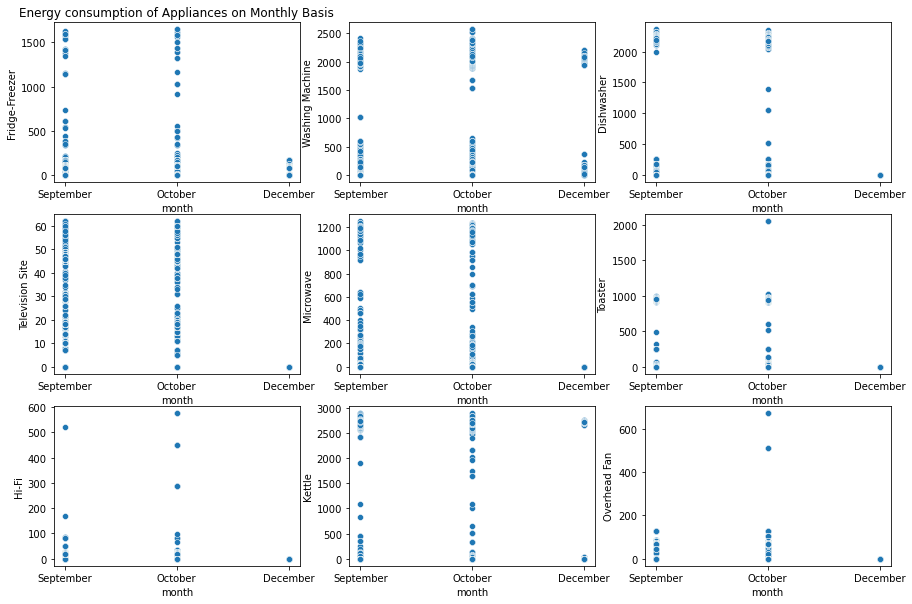

In [16]:
#Let us now represent energy consumption of appliances on monthly basis in graphical format

plt.figure(figsize = (15,10)) #size of plot
plt.subplot(3,3,1) #positioning subplots
sns.scatterplot(x=load['month'], y=load['Fridge-Freezer'])
plt.title("Energy consumption of Appliances on Monthly Basis")
plt.subplot(3,3,2)
sns.scatterplot(x=load['month'], y=load['Washing Machine'])
plt.subplot(3,3,3)
sns.scatterplot(x=load['month'], y=load['Dishwasher'])
plt.subplot(3,3,4)
sns.scatterplot(x=load['month'], y=load['Television Site'])
plt.subplot(3,3,5)
sns.scatterplot(x=load['month'], y=load['Microwave'])
plt.subplot(3,3,6)
sns.scatterplot(x=load['month'], y=load['Toaster'])
plt.subplot(3,3,7)
sns.scatterplot(x=load['month'], y=load['Hi-Fi'])
plt.subplot(3,3,8)
sns.scatterplot(x=load['month'], y=load['Kettle'])
plt.subplot(3,3,9)
sns.scatterplot(x=load['month'], y=load['Overhead Fan'])
plt.show()

In [17]:
load.timing.unique()

array(['Night', 'Morning', 'Afternoon', 'Evening'], dtype=object)

In [18]:
load

,Day,Month,Year,Hour,Minute,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,month,timing
0,17,9,2013,22,08,695,88,0,0,0,0,0,0,0,0,September,Night
1,17,9,2013,22,08,694,88,0,0,0,0,0,0,0,0,September,Night
2,17,9,2013,22,08,694,88,0,0,0,0,0,0,0,0,September,Night
3,17,9,2013,22,08,702,88,0,0,0,0,0,0,0,0,September,Night
4,17,9,2013,22,08,700,88,0,0,0,0,0,0,0,0,September,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,26,12,2013,16,07,355,1,5,0,0,0,0,0,0,0,December,Afternoon
487247,26,12,2013,16,08,358,1,5,0,0,0,0,0,0,0,December,Afternoon
487248,26,12,2013,16,08,322,1,25,0,0,0,0,0,0,0,December,Afternoon
487249,26,12,2013,16,08,280,1,25,0,0,0,0,0,0,0,December,Afternoon


<AxesSubplot:xlabel='month', ylabel='Overhead Fan'>

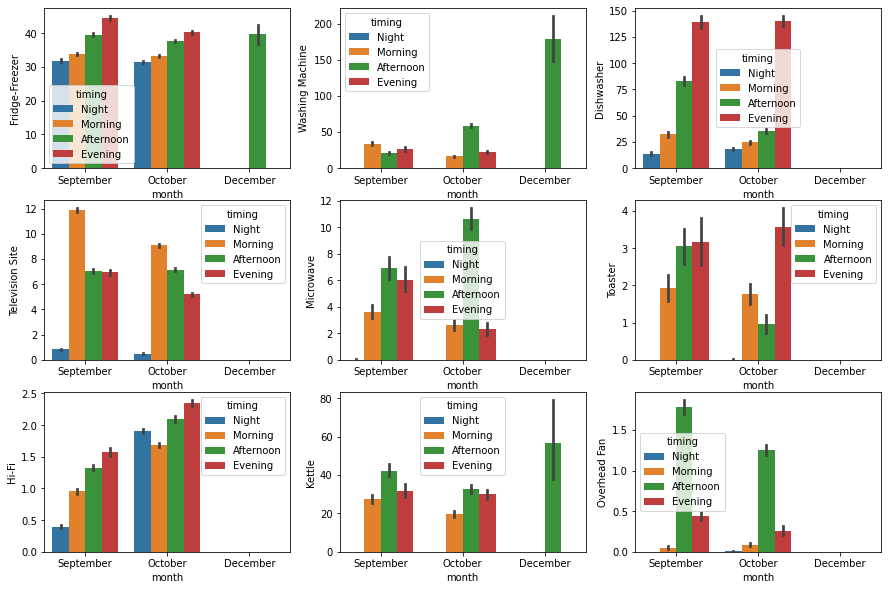

In [19]:
#Explore time-of-use of appliances at different hours of the day
plt.figure(figsize = (15,10))
plt.subplot(3,3,1)
sns.barplot(x=load['month'], y=load['Fridge-Freezer'], hue = load['timing'])
plt.subplot(3,3,2)
sns.barplot(x=load['month'], y=load['Washing Machine'], hue = load['timing'])
plt.subplot(3,3,3)
sns.barplot(x=load['month'], y=load['Dishwasher'], hue = load['timing'])
plt.subplot(3,3,4)
sns.barplot(x=load['month'], y=load['Television Site'], hue = load['timing'])
plt.subplot(3,3,5)
sns.barplot(x=load['month'], y=load['Microwave'], hue = load['timing'])
plt.subplot(3,3,6)
sns.barplot(x=load['month'], y=load['Toaster'], hue = load['timing'])
plt.subplot(3,3,7)
sns.barplot(x=load['month'], y=load['Hi-Fi'], hue = load['timing'])
plt.subplot(3,3,8)
sns.barplot(x=load['month'], y=load['Kettle'], hue = load['timing'])
plt.subplot(3,3,9)
sns.barplot(x=load['month'], y=load['Overhead Fan'], hue = load['timing'])

In [20]:
dp= load.drop(["Month","Aggregate","Year","month","Day","Hour","Minute"], axis=1)
dp

,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,timing
0,88,0,0,0,0,0,0,0,0,Night
1,88,0,0,0,0,0,0,0,0,Night
2,88,0,0,0,0,0,0,0,0,Night
3,88,0,0,0,0,0,0,0,0,Night
4,88,0,0,0,0,0,0,0,0,Night
...,...,...,...,...,...,...,...,...,...,...
487246,1,5,0,0,0,0,0,0,0,Afternoon
487247,1,5,0,0,0,0,0,0,0,Afternoon
487248,1,25,0,0,0,0,0,0,0,Afternoon
487249,1,25,0,0,0,0,0,0,0,Afternoon


In [21]:
load

,Day,Month,Year,Hour,Minute,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,month,timing
0,17,9,2013,22,08,695,88,0,0,0,0,0,0,0,0,September,Night
1,17,9,2013,22,08,694,88,0,0,0,0,0,0,0,0,September,Night
2,17,9,2013,22,08,694,88,0,0,0,0,0,0,0,0,September,Night
3,17,9,2013,22,08,702,88,0,0,0,0,0,0,0,0,September,Night
4,17,9,2013,22,08,700,88,0,0,0,0,0,0,0,0,September,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,26,12,2013,16,07,355,1,5,0,0,0,0,0,0,0,December,Afternoon
487247,26,12,2013,16,08,358,1,5,0,0,0,0,0,0,0,December,Afternoon
487248,26,12,2013,16,08,322,1,25,0,0,0,0,0,0,0,December,Afternoon
487249,26,12,2013,16,08,280,1,25,0,0,0,0,0,0,0,December,Afternoon


In [22]:
dx= load.drop(["Month","Aggregate","Year","timing","month","Day","Hour","Minute"], axis=1)
dx

,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,88,0,0,0,0,0,0,0,0
1,88,0,0,0,0,0,0,0,0
2,88,0,0,0,0,0,0,0,0
3,88,0,0,0,0,0,0,0,0
4,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
487246,1,5,0,0,0,0,0,0,0
487247,1,5,0,0,0,0,0,0,0
487248,1,25,0,0,0,0,0,0,0
487249,1,25,0,0,0,0,0,0,0


In [23]:
dy=dx.describe()
dy

,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
count,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000
mean,35.509772,21.637725,48.534603,5.832907,3.713427,1.518560,1.590277,20.477056,0.427638
std,45.337155,193.706782,311.842492,15.350397,64.432395,37.737607,5.416394,234.841950,5.201527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1647.000000,2571.000000,2358.000000,62.000000,1251.000000,2048.000000,576.000000,2905.000000,672.000000


In [24]:
dy.iloc[1]

Fridge-Freezer     35.509772
Washing Machine    21.637725
Dishwasher         48.534603
Television Site     5.832907
Microwave           3.713427
Toaster             1.518560
Hi-Fi               1.590277
Kettle             20.477056
Overhead Fan        0.427638
Name: mean, dtype: float64

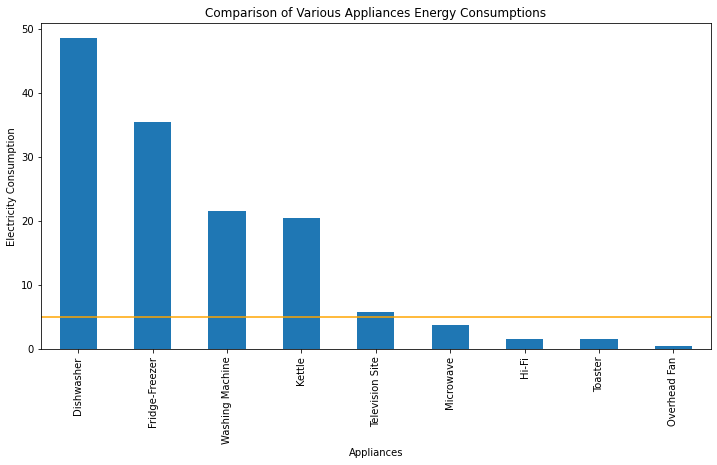

In [25]:
fig=dx.mean().sort_values(ascending=False).plot.bar(figsize=(12,6))
fig.axhline(y=5, color='orange')
plt.xlabel('Appliances')
plt.ylabel('Electricity Consumption')
plt.title("Comparison of Various Appliances Energy Consumptions")
plt.show()

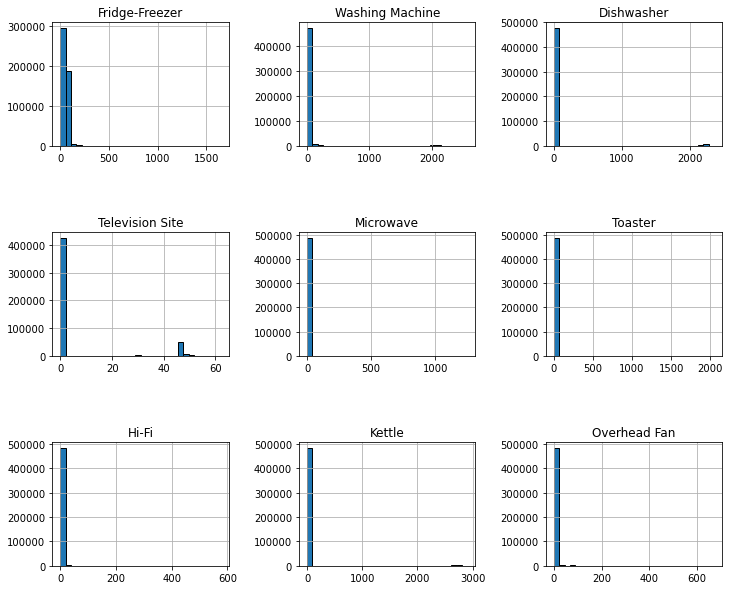

In [26]:
#check the distribution variable for all appliances
dx.hist(figsize=(12,10), bins=30, edgecolor ='black')
plt.subplots_adjust(hspace=0.7, wspace=0.4)

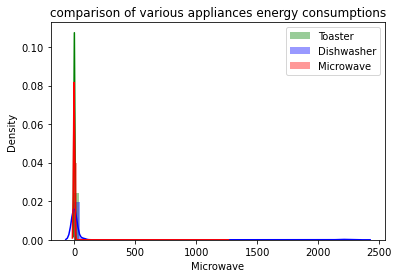

In [27]:
sns.distplot(load['Toaster'], color='green', label ='Toaster')
sns.distplot(load['Dishwasher'], color='blue', label ='Dishwasher')
sns.distplot(load['Microwave'], color='red', label ='Microwave')
plt.title('comparison of various appliances energy consumptions')
plt.legend()

In [28]:
load

,Day,Month,Year,Hour,Minute,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,month,timing
0,17,9,2013,22,08,695,88,0,0,0,0,0,0,0,0,September,Night
1,17,9,2013,22,08,694,88,0,0,0,0,0,0,0,0,September,Night
2,17,9,2013,22,08,694,88,0,0,0,0,0,0,0,0,September,Night
3,17,9,2013,22,08,702,88,0,0,0,0,0,0,0,0,September,Night
4,17,9,2013,22,08,700,88,0,0,0,0,0,0,0,0,September,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,26,12,2013,16,07,355,1,5,0,0,0,0,0,0,0,December,Afternoon
487247,26,12,2013,16,08,358,1,5,0,0,0,0,0,0,0,December,Afternoon
487248,26,12,2013,16,08,322,1,25,0,0,0,0,0,0,0,December,Afternoon
487249,26,12,2013,16,08,280,1,25,0,0,0,0,0,0,0,December,Afternoon


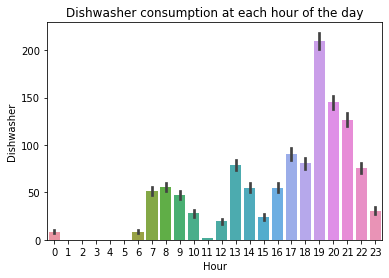

In [29]:
sns.barplot(x=load['Hour'], y=load['Dishwasher'])
plt.title('Dishwasher consumption at each hour of the day')
plt.show()

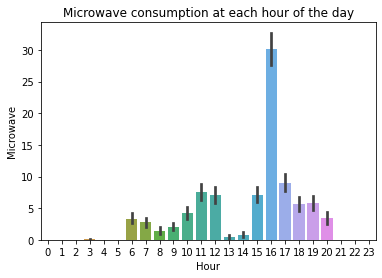

In [30]:
sns.barplot(x=load['Hour'], y=load['Microwave'])
plt.title('Microwave consumption at each hour of the day')
plt.show()

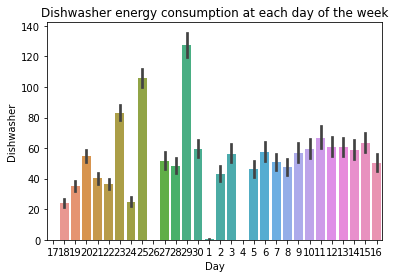

In [31]:
sns.barplot(x=load['Day'], y=load['Dishwasher'])
plt.title('Dishwasher energy consumption at each day of the week')
plt.show()

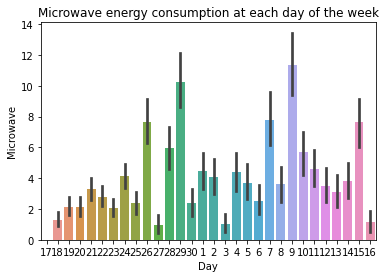

In [32]:
sns.barplot(x=load['Day'], y=load['Microwave'])
plt.title('Microwave energy consumption at each day of the week')
plt.show()

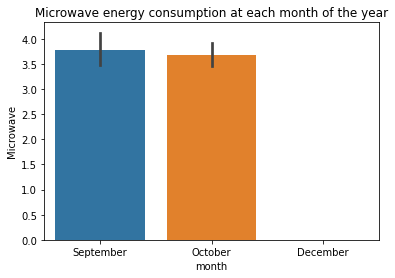

In [33]:
sns.barplot(x=load['month'], y=load['Microwave'])
plt.title('Microwave energy consumption at each month of the year')
plt.show()

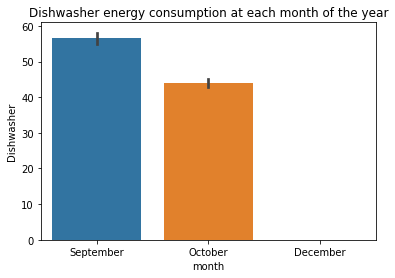

In [34]:
sns.barplot(x=load['month'], y=load['Dishwasher'])
plt.title('Dishwasher energy consumption at each month of the year')
plt.show()

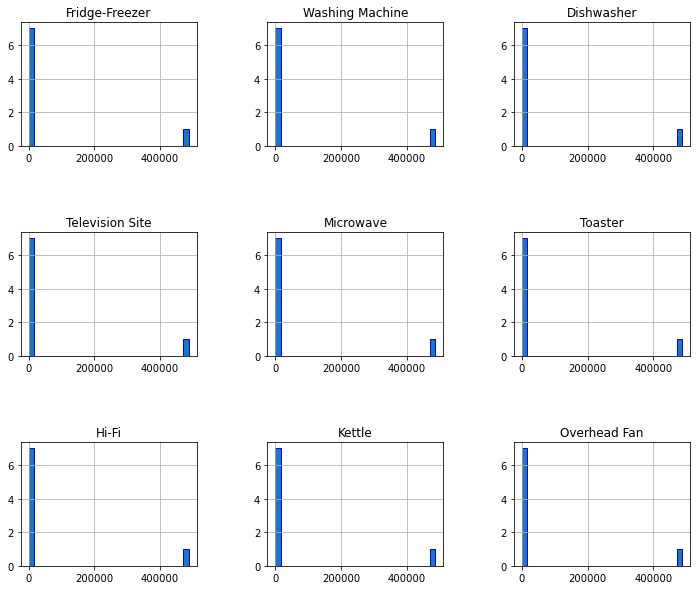

In [35]:
#check the distribution variable for all appliances
dy.hist(figsize=(12,10), bins=30, edgecolor ='blue')
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [36]:
#Herein, Dishwasher and Microwave shall be studied for outliers
#Let's capture the two appliances:
dz=dy.loc[:,['Dishwasher', 'Microwave']]
dz

,Dishwasher,Microwave
count,487251.000000,487251.000000
mean,48.534603,3.713427
std,311.842492,64.432395
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,2358.000000,1251.000000


In [37]:
dz.describe()

,Dishwasher,Microwave
count,8.000000,8.000000
mean,61246.172137,61071.268228
std,172133.854873,172203.163960
min,0.000000,0.000000
25%,0.000000,0.000000
50%,24.267302,1.856713
75%,823.381869,361.074297
max,487251.000000,487251.000000


<AxesSubplot:xlabel='Microwave'>

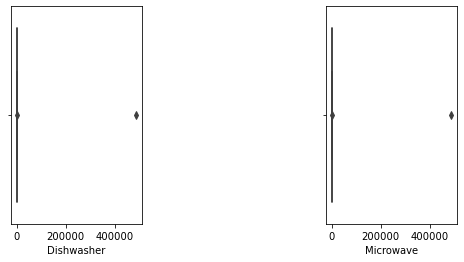

In [38]:
#Let's make a boxplot of the Dishwasher and Microwave variable to visualize outliers:
plt.figure(figsize = (8,4))
plt.subplot(1,3,1)
sns.boxplot(dz['Dishwasher'])
plt.subplot(1,3,3)
sns.boxplot(dz['Microwave'])

In [39]:
#The outliers are the asterisks sitting outside the whiskers, 
#which delimit the inter-quartile range proximity rule boundaries.

In [40]:
#Let's create a function to find the boundaries of a variable distribution, 
#using the inter-quartile range proximity rule:

def find_boundaries(dz, variable, distance):

    IQR = dz[variable].quantile(0.75) - dz[variable].quantile(0.25)

    lower_boundary = dz[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = dz[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [41]:
#Let's use the function to determine the limits of the Dishwasher variable:
Dishwasher_upper_boundary, Dishwasher_lower_boundary = find_boundaries(dz, 'Dishwasher', 1.5)
Dishwasher_upper_boundary, Dishwasher_lower_boundary

(2058.454672436913, -1235.0728034621477)

In [42]:
#further, we create a Boolean vector to flag the outliers in Toaster:
outliers_Dishwasher = np.where(dx['Dishwasher'] > Dishwasher_upper_boundary, True, 
                    np.where(dx['Dishwasher'] < Dishwasher_lower_boundary, True, 
                    False))
outliers_Dishwasher

array([False, False, False, ..., False, False, False])

<AxesSubplot:xlabel='Dishwasher'>

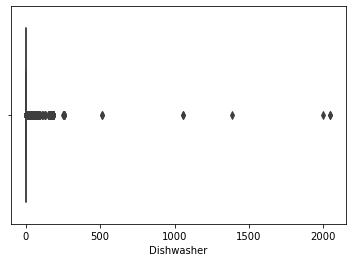

In [43]:
#then, we remove the outliers from the dataset:
Dishwasher_trimmed = load.loc[~(outliers_Dishwasher)]
sns.boxplot(Dishwasher_trimmed['Dishwasher'])

In [44]:
#Secondly, let's use the function to determine the limits of the Microwave variable:
Microwave_upper_boundary,Microwave_lower_boundary = find_boundaries(dx, 'Microwave', 1.5)
Microwave_upper_boundary, Microwave_lower_boundary

(0.0, 0.0)

In [45]:
#further, we create a Boolean vector to flag the outliers in Microwave:
outliers_Microwave = np.where(dx['Microwave'] > Microwave_upper_boundary, True, 
                    np.where(dx['Microwave'] < Microwave_lower_boundary, True, 
                    False))
outliers_Microwave

array([False, False, False, ..., False, False, False])

<AxesSubplot:xlabel='Microwave'>

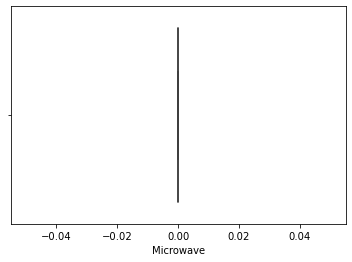

In [46]:
#then, we remove the outliers from the dataset:
Microwave_trimmed = load.loc[~(outliers_Microwave)]
sns.boxplot(Microwave_trimmed['Microwave'])

# Machine learning predictive model for the client household to predict future electricity usage  using Fridge_Freezer. 

In [ ]:
#Importing libraries

In [47]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objects as go
#Import Data Transformation Libraries
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler


In [122]:
#Import provided dataset for the project
da=pd.read_csv('appliancesload.csv')
da

,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,17/09/2013 22:08,695,88,0,0,0,0,0,0,0,0
1,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0
2,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0
3,17/09/2013 22:08,702,88,0,0,0,0,0,0,0,0
4,17/09/2013 22:08,700,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1008348,10/04/2014 00:35,115,1,0,0,0,0,0,0,0,0
1008349,10/04/2014 00:35,115,1,0,0,0,0,0,0,0,0
1008350,10/04/2014 00:35,116,1,0,0,0,0,0,0,0,0
1008351,10/04/2014 00:35,116,1,0,0,0,0,0,0,0,0


In [123]:
#seperation of the Time column that's attached to dateframe from the source
da[["Date", "time"]] = da["Time"].str.split(" ", expand = True)
da

,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,Date,time
0,17/09/2013 22:08,695,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
1,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
2,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
3,17/09/2013 22:08,702,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
4,17/09/2013 22:08,700,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008348,10/04/2014 00:35,115,1,0,0,0,0,0,0,0,0,10/04/2014,00:35
1008349,10/04/2014 00:35,115,1,0,0,0,0,0,0,0,0,10/04/2014,00:35
1008350,10/04/2014 00:35,116,1,0,0,0,0,0,0,0,0,10/04/2014,00:35
1008351,10/04/2014 00:35,116,1,0,0,0,0,0,0,0,0,10/04/2014,00:35


In [124]:
dp=da.loc[:,['Date', 'Aggregate', 'Fridge-Freezer']]
dp

,Date,Aggregate,Fridge-Freezer
0,17/09/2013,695,88
1,17/09/2013,694,88
2,17/09/2013,694,88
3,17/09/2013,702,88
4,17/09/2013,700,88
...,...,...,...
1008348,10/04/2014,115,1
1008349,10/04/2014,115,1
1008350,10/04/2014,116,1
1008351,10/04/2014,116,1


In [126]:
dp.columns = dp.columns.str.replace('Fridge_Freezer', 'Fridge_Freezer')
dp

,Date,Aggregate,Fridge-Freezer
0,17/09/2013,695,88
1,17/09/2013,694,88
2,17/09/2013,694,88
3,17/09/2013,702,88
4,17/09/2013,700,88
...,...,...,...
1008348,10/04/2014,115,1
1008349,10/04/2014,115,1
1008350,10/04/2014,116,1
1008351,10/04/2014,116,1


In [127]:
dp['Date'] = pd.to_datetime(dp['Date'], format = "%d/%m/%Y")
dp

,Date,Aggregate,Fridge-Freezer
0,2013-09-17,695,88
1,2013-09-17,694,88
2,2013-09-17,694,88
3,2013-09-17,702,88
4,2013-09-17,700,88
...,...,...,...
1008348,2014-04-10,115,1
1008349,2014-04-10,115,1
1008350,2014-04-10,116,1
1008351,2014-04-10,116,1


In [128]:
dp[~dp.Date.dt.year.isin([2014])]

,Date,Aggregate,Fridge-Freezer
0,2013-09-17,695,88
1,2013-09-17,694,88
2,2013-09-17,694,88
3,2013-09-17,702,88
4,2013-09-17,700,88
...,...,...,...
487246,2013-12-26,355,1
487247,2013-12-26,358,1
487248,2013-12-26,322,1
487249,2013-12-26,280,1


# Data spliting for training

In [54]:
def create_split_features(dp, target_variable):
    """
    Creates time series features from datetime index
    Sepearte the target variable
    Use train_test_split() in order to create training and validation datasets.
    
    Returns:
        X (int): Extracted values from datetime index, dataframe
        y (int): Values of target variable, numpy array of integers
    """
    dp['date'] = dp.index
    dp['day'] = dp['Date'].dt.day
    dp['month'] = dp['Date'].dt.month
    
    
    X = dp[['day','month', 'Aggregate']]
    
    if target_variable:
        y = dp[target_variable]
    
    # split the full data 80:20 into training:valid sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=101)

    return X_train,X_valid,y_train,y_valid

In [55]:
X_train, X_valid, y_train, y_valid = create_split_features(dk,target_variable="Fridge_Freezer")

In [129]:
X_train

,day,month,Aggregate
364015,15,10,216
16528,19,9,62
700648,17,3,260
357818,14,10,2059
220060,3,10,138
...,...,...,...
218264,3,10,195
933667,4,4,85
435556,21,10,91
990046,8,4,94


In [130]:
y_train

364015    86
16528      1
700648     1
357818     1
220060     1
          ..
218264    84
933667     1
435556     1
990046     1
494340     1
Name: Fridge_Freezer, Length: 705846, dtype: int64

In [58]:
# Split data again
# Note that 0.875*0.8 = 0.7 so the final effect of these two splits is to have 
#the original data split into training/validation/test sets in a 70:20:10 ratio.
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.875, random_state=101)  

In [131]:
print("TRAIN SET:", len(X_train), "VALIDATION SET:", len(X_valid), "TEST SET:", len(X_test))

TRAIN SET: 705846 VALIDATION SET: 201671 TEST SET: 100836


In [132]:
# Set up a function to encode according to the input provided using one-hot encoding
def encoding(dp):
    enc = pd.get_dummies(dk, drop_first=True) #this will encode the "promo" feature
    return enc

In [133]:
#Apply encoding function
X_train = encoding(X_train)

In [134]:
X_train

,Aggregate,Fridge-Freezer,Date_01/04/2014,Date_01/10/2013,Date_02/03/2014,Date_02/04/2014,Date_02/10/2013,Date_03/03/2014,Date_03/04/2014,Date_03/10/2013,Date_04/03/2014,Date_04/04/2014,Date_04/10/2013,Date_05/03/2014,Date_05/04/2014,Date_05/10/2013,Date_06/03/2014,Date_06/04/2014,Date_06/10/2013,Date_07/03/2014,Date_07/04/2014,Date_07/10/2013,Date_08/03/2014,Date_08/04/2014,Date_08/10/2013,Date_09/03/2014,Date_09/04/2014,Date_09/10/2013,Date_10/03/2014,Date_10/04/2014,Date_10/10/2013,Date_11/03/2014,Date_11/10/2013,Date_12/03/2014,Date_12/10/2013,Date_13/03/2014,Date_13/10/2013,Date_14/03/2014,Date_14/10/2013,Date_15/03/2014,Date_15/10/2013,Date_16/03/2014,Date_16/10/2013,Date_17/03/2014,Date_17/09/2013,Date_17/10/2013,Date_18/03/2014,Date_18/09/2013,Date_18/10/2013,Date_19/03/2014,Date_19/09/2013,Date_19/10/2013,Date_20/03/2014,Date_20/09/2013,Date_20/10/2013,Date_21/03/2014,Date_21/09/2013,Date_21/10/2013,Date_22/03/2014,Date_22/09/2013,Date_22/10/2013,Date_23/03/2014,Date_23/09/2013,Date_23/10/2013,Date_24/03/2014,Date_24/09/2013,Date_24/10/2013,Date_25/03/2014,Date_25/09/2013,Date_25/10/2013,Date_26/03/2014,Date_26/09/2013,Date_26/12/2013,Date_27/03/2014,Date_27/09/2013,Date_28/02/2014,Date_28/03/2014,Date_28/09/2013,Date_29/03/2014,Date_29/09/2013,Date_30/03/2014,Date_30/09/2013,Date_31/03/2014
0,695,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,694,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,694,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,702,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,700,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008348,115,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1008349,115,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1008350,116,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1008351,116,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
X_valid = encoding(X_valid)

In [64]:
X_test = encoding(X_test)

In [65]:
scaler = RobustScaler()
scaler.fit(X_train)

RobustScaler()

In [66]:
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [135]:
#Convert the NumPy arrays into dataframes just to use for correlation analysis:
variables = ['day','month', 'Aggregate']
X_train_scaled_dp = pd.DataFrame(X_train_scaled, columns = variables)
X_valid_scaled_dp = pd.DataFrame(X_valid_scaled, columns = variables)
X_test_scaled_dp = pd.DataFrame(X_test_scaled, columns = variables)

<AxesSubplot:>

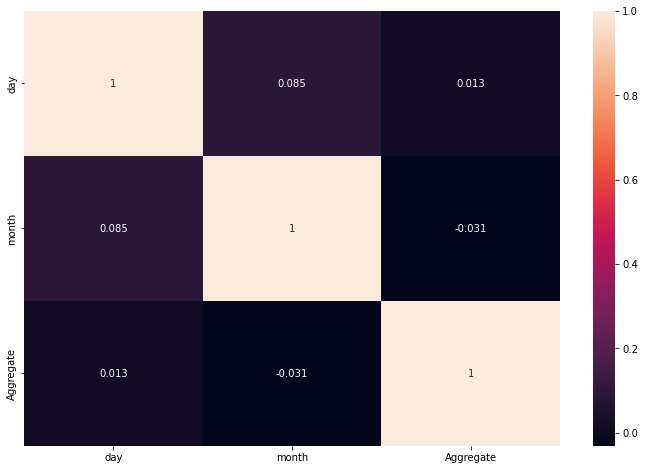

In [136]:
# Creating correlation matrix for the dataframe
corr = X_train_scaled_dp.corr()
#Create a heatmap to visualize correlation between the features
fig, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(corr, annot = True)

In [137]:
#Getting new sets of scaled features
scaler = RobustScaler()
scaler.fit(X_train_scaled_dp)

X_train_scaled = scaler.transform(X_train_scaled_dp)
X_valid_scaled = scaler.transform(X_valid_scaled_dp)
X_test_scaled = scaler.transform(X_test_scaled_dp)

In [138]:
X_train_scaled.shape

(705846, 3)

In [139]:
dp_plot = dp.copy()

In [140]:
dp_plot.columns = dp_plot.columns.str.replace(' ', '_')

In [141]:
dp_plot

,Date,Aggregate,Fridge-Freezer
0,2013-09-17,695,88
1,2013-09-17,694,88
2,2013-09-17,694,88
3,2013-09-17,702,88
4,2013-09-17,700,88
...,...,...,...
1008348,2014-04-10,115,1
1008349,2014-04-10,115,1
1008350,2014-04-10,116,1
1008351,2014-04-10,116,1


In [74]:
#Machine Learning, Feature Importance and Evaluation Metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor
from numpy import mean
import pickle

In [142]:
# Defining the model
model = LinearRegression()
#fit the model (We got error here, beacuse the target has missing values)
model.fit(X_train_scaled, y_train)

LinearRegression()

Aggregate    0.483594
day          1.066238
month        1.823189
dtype: float64


<AxesSubplot:title={'center':'Top Important Drivers of Energy Consumption by Fridge_Freezer Using Linear Regression'}>

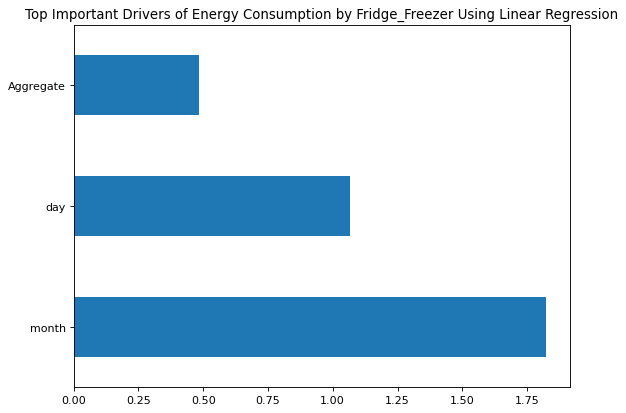

In [143]:
# Defining the model
model = LinearRegression()
# Fit the model (I used validation data here because the train data(y_train) need to be fixed)
model.fit(X_valid_scaled, y_valid)
# Get importance
importance = model.coef_
# Summary of feature importance
predictors = X_valid_scaled_dp.columns
coef = pd.Series(importance, predictors).sort_values()
print(coef)  

# visualize feature importance
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Top Important Drivers of Energy Consumption by Fridge_Freezer Using Linear Regression")

feat_importances = pd.Series(model.coef_, index= X_valid_scaled_dp.columns)

feat_importances.nlargest(6).plot(kind='barh')

In [77]:
#Predict the missing values in y_train and save as y_train_pred
y_train_pred = model.predict(X_train)

In [78]:
#Put the prediction in a dataframe now called ypred (just for checks)
ypred = pd.DataFrame(y_train_pred ,columns=['New_y_train'])
ypred

,New_y_train
0,172.173536
1,100.141765
2,182.821839
3,1062.371709
4,121.658325
...,...
705841,149.223203
705842,86.154926
705843,118.121665
705844,94.772226


In [79]:
#No missing value in the target (y_train/ypred) again
ypred.isnull().sum()

New_y_train    0
dtype: int64

In [80]:
#Prediction of missing values in y_test and save as y_test_pred
y_test_pred = model.predict(X_test_scaled)

month        0.00010
day          0.00042
Aggregate    0.99948
dtype: float64


<AxesSubplot:title={'center':'Top Important Drivers of Energy Consumption by Fridge_Freezer Using Decision Tree'}>

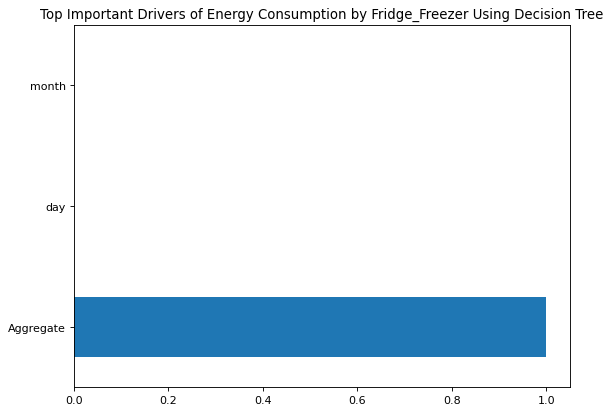

In [81]:
# Defining the model
model = DecisionTreeRegressor()
# Fit the model
model.fit(X_train_scaled, y_train_pred)
# Get importance
importance = model.feature_importances_
# Summary of feature importance
predictors = X_train_scaled_dk.columns
coef = pd.Series(importance, predictors).sort_values()
print(coef)  

# Visualization feature importance
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Top Important Drivers of Energy Consumption by Fridge_Freezer Using Decision Tree")

feat_importances = pd.Series(model.feature_importances_, index= X_train_scaled_dk.columns)

feat_importances.nlargest(6).plot(kind='barh')

month        0.000793
day          0.000976
Aggregate    0.998231
dtype: float32


<AxesSubplot:title={'center':'Top Important Drivers of Energy Consumption by Fridge_Freezer Using XGBoost'}>

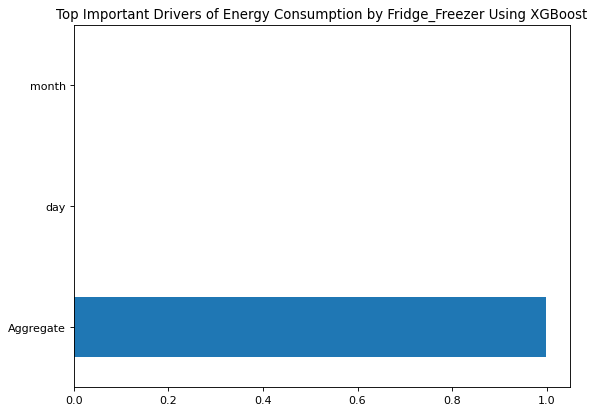

In [82]:
# Defining the model
model = XGBRegressor()
# Fit the model
model.fit(X_train_scaled, y_train_pred)
# Get importance
importance = model.feature_importances_
# Summary of feature importance
predictors = X_train_scaled_dk.columns
coef = pd.Series(importance, predictors).sort_values()
print(coef)  

# Visualizatio of feature importance
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Top Important Drivers of Energy Consumption by Fridge_Freezer Using XGBoost")

feat_importances = pd.Series(model.feature_importances_, index= X_train_scaled_dk.columns)

feat_importances.nlargest(6).plot(kind='barh')

In [144]:
X_train_scaled_dp.drop(['month'], axis=1, inplace=True)
X_train_scaled_dp

,day,Aggregate
0,-0.0625,0.430380
1,0.1875,-0.544304
2,0.0625,0.708861
3,-0.1250,12.094937
4,-0.8125,-0.063291
...,...,...
705841,-0.8125,0.297468
705842,-0.7500,-0.398734
705843,0.3125,-0.360759
705844,-0.5000,-0.341772


In [145]:
X_test_scaled_dp.drop(['month'], axis=1, inplace=True)
X_test_scaled_dp

,day,Aggregate
0,-0.4375,-0.012658
1,-0.6250,-0.272152
2,0.5000,-0.069620
3,-0.0625,14.613924
4,-0.8750,14.848101
...,...,...
100831,-0.3125,-0.329114
100832,-0.1875,0.037975
100833,-0.4375,-0.341772
100834,-0.0625,-0.063291


In [85]:
X_valid_scaled_dk.drop(['month'], axis=1, inplace=True)
X_valid_scaled_dk

,day,Aggregate
0,-0.8750,-0.563291
1,0.5625,0.487342
2,0.4375,-0.544304
3,-0.7500,0.664557
4,0.5000,-0.050633
...,...,...
201666,0.8750,1.196203
201667,0.8125,-0.411392
201668,0.6250,0.664557
201669,-0.8750,1.113924


In [86]:
#Adjusted data above re-Scaled
scaler = RobustScaler()
scaler.fit(X_train)

RobustScaler()

In [87]:
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [88]:
#Shape has not reduced even after we removed "month"
X_train_scaled.shape

(705846, 3)

In [89]:
X_train_scaled_dp.shape

(705846, 2)

In [90]:
y_train_pred.shape

(705846,)

In [91]:
y_valid.shape

(201671,)

In [92]:
y_test_pred.shape

(100836,)

# Import Libraries

In [146]:
# 1. Import the estimator object (model)
from sklearn.linear_model import LinearRegression
# 2. Create an instance of the estimator
linear_regression = LinearRegression()
# 3. Use trainning data to train the estimator
linear_regression.fit(X_train_scaled_dp, y_train_pred)

LinearRegression()

In [147]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred1 = linear_regression.predict(X_test_scaled_dp) # Test

print('Test r2 score: ', r2_score(y_pred1, y_test_pred))

test_mse1 = mean_squared_error(y_pred1, y_test_pred)

test_rmse1 = np.sqrt(test_mse1)

print('Test RMSE: %.2f' % test_rmse1)

Test r2 score:  -0.1660488669733664
Test RMSE: 537.90


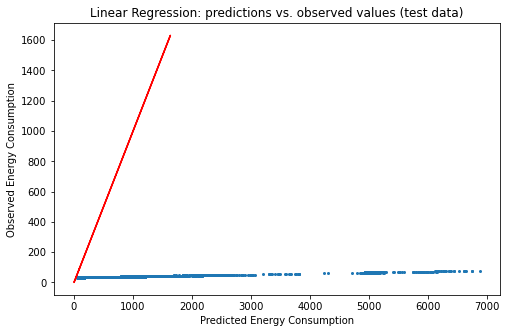

In [148]:
#Evaluate the Performance of our Predictive Model (Linear Regression)
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(linear_regression.predict(X_test_scaled_dp), y_test_pred, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('Linear Regression: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted Energy Consumption')
ax.set_ylabel('Observed Energy Consumption');

In [149]:
# 1. Import the estimator object (model)
from sklearn.neighbors import KNeighborsRegressor
# 2. Create an instance of the estimator
knn = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='euclidean', n_jobs=-1)
# 3. Use the trainning data to train the estimator
knn.fit(X_train_scaled_dp, y_train_pred)

KNeighborsRegressor(metric='euclidean', n_jobs=-1, weights='distance')

In [150]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred2 = knn.predict(X_test_scaled_dp) # Test

print('Test r2 score: ', r2_score(y_pred2, y_test_pred))

test_mse2 = mean_squared_error(y_pred2, y_test_pred)

test_rmse2 = np.sqrt(test_mse2)

print('Test RMSE: %.2f' % test_rmse2)

Test r2 score:  -0.16583582672209607
Test RMSE: 537.90


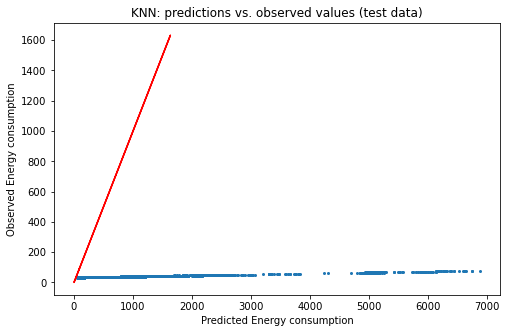

In [152]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(knn.predict(X_test_scaled_dp), y_test_pred, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('KNN: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted Energy consumption')
ax.set_ylabel('Observed Energy consumption');

In [153]:
# 1. Import the estimator object (model)
from sklearn.tree import DecisionTreeRegressor
# 2. Create an instance of the estimator
dtree = DecisionTreeRegressor(max_depth=3)
# 3. Use the trainning data to train the estimator
dtree.fit(X_train_scaled_dp, y_train_pred)

DecisionTreeRegressor(max_depth=3)

In [100]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred3 = dtree.predict(X_test_scaled_dk) # Test

print('Test r2 score: ', r2_score(y_pred3, y_test_pred))

test_mse3 = mean_squared_error(y_pred3, y_test_pred)

test_rmse3 = np.sqrt(test_mse3)

print('Test RMSE: %.2f' % test_rmse3)

Test r2 score:  -0.1680310283084172
Test RMSE: 535.63


In [154]:
from sklearn.ensemble import RandomForestRegressor
# 1. Import the estimator object (model)
from sklearn.tree import DecisionTreeRegressor
# 2. Create an instance of the estimator
rf = RandomForestRegressor(max_depth=3) #Notice here also we are using here "random forest regressor" not "random forest classifier"
# 3. Use the trainning data to train the estimator
rf.fit(X_train_scaled_dp, y_train_pred)

RandomForestRegressor(max_depth=3)

In [155]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred4 = rf.predict(X_test_scaled_dp) # Test

print('Test r2 score: ', r2_score(y_pred4, y_test_pred))

test_mse4 = mean_squared_error(y_pred4, y_test_pred)

test_rmse4 = np.sqrt(test_mse4)

print('Test RMSE: %.2f' % test_rmse4)

Test r2 score:  -0.16812854007248657
Test RMSE: 535.48


In [156]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled_dp, y_train_pred, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [157]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred5 = xgb_model.predict(X_test_scaled_dp) # Test

print('Test r2 score: ', r2_score(y_pred5, y_test_pred))

test_mse5 = mean_squared_error(y_pred5, y_test_pred)

test_rmse5 = np.sqrt(test_mse5)

print('Test RMSE: %.2f' % test_rmse5)

Test r2 score:  -0.16601718354222905
Test RMSE: 537.88


# Training Multiple Models Using Python Functions

In [158]:
# Get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LinearRegression()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['rf'] = RandomForestRegressor()
    models['svm'] = SVR()
    models['xgb'] = XGBRegressor() 
    return models

In [159]:
# Fit Models on training data
def fit_model(model, X, y):
    model.fit(X, y)
    return model

In [160]:
# Evaluate models using validation data
def evaluate_model_valid(model,X,y):
    pred = model.predict(X)
    scores = r2_score(pred, y)
    return scores

In [109]:
# Evaluate models using test data
def evaluate_model_test(model,X,y):
    pred = model.predict(X)
    scores = r2_score(pred, y)
    return scores

In [110]:
# Evaluate models using cross-validation
def evaluate_model_cv(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [161]:
#Possible different evaluation Metrics in Scikit-Learn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei